In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Φιλτράρισμα εικόνας

Το φιλτράρισμα αποτελεί μία από τις βασικότερες και πιο κοινές λειτουργίες της επεξεργασίας εικόνας. Με το φιλτράρισμα μπορούμε να αφαιρέσουμε το Θόρυβο από εικόνες ή να ενισχύσουμε τα χαρακτηριστικά τους. 

### Χωρικό φιλτράρισμα (Spatial filtering ή local filtering)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.cmap'] = 'gray'

Στο τοπικό φιλτράρισμα η τιμή ενός εικονοστοιχείου μπορεί να αλλάξει σύμφωνα με τις διαβαθισμένες τιμές των εικονοστοιχείων της γειτονιάς, βάσει ενός "στοιχείου δομής" ή "πυρήνα".
Θα εξετάσουμε αρχικά μία μονοδιάστατη συνάρτηση, τη βηματική συνάρτηση

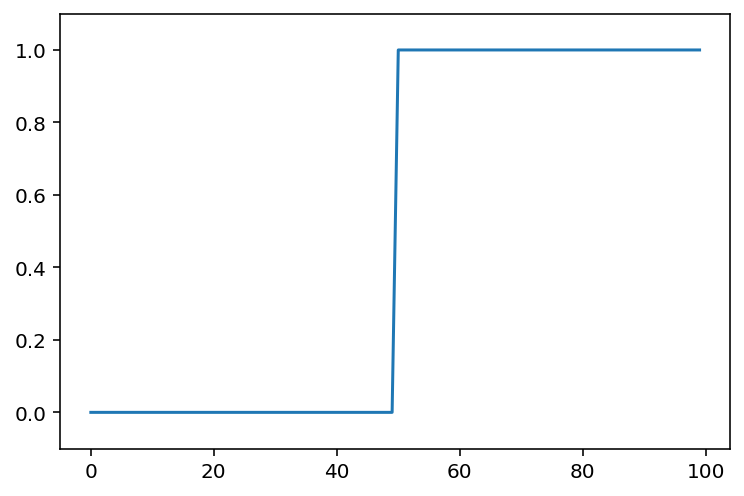

In [3]:
step_signal = np.zeros(100)
step_signal[50:] = 1
fig, ax = plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

Θα προσθέσουμε τυχαίο θόρυβο στο σήμα:

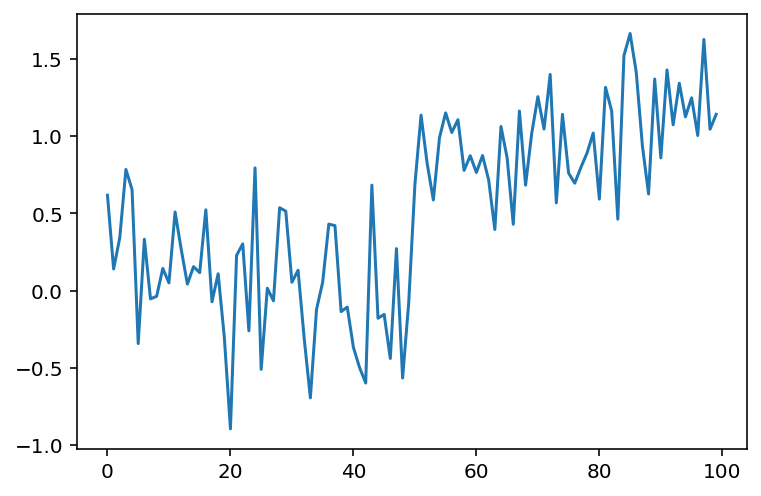

In [4]:
# Just to make sure we all see the same results
np.random.seed(0)
noisy_signal = (step_signal + np.random.normal(0, 0.35, step_signal.shape))
fig, ax = plt.subplots()
ax.plot(noisy_signal);

Ο πιο απλός τρόπο για την ανάκτηση του αρχικού σήματος είναι να πάρουμε την μέση τιμή μεταξύ γειτονικών τιμών

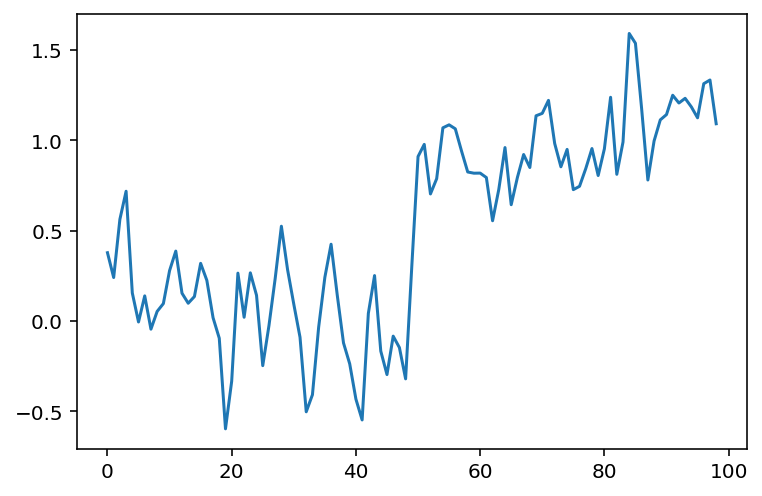

In [5]:
# Take the mean of neighboring pixels
smooth_signal = (noisy_signal[:-1] + noisy_signal[1:]) / 2.0
fig, ax = plt.subplots()
ax.plot(smooth_signal);

Ας πάρουμε την μέση τιμή μεταξύ τριών γειτονικών τιμών. 

Θα δημιουργήσουμε έναν πίνακα εξόδου `smooth_signal3`, του ίδιου μήκους με το` noisy_signal` και σε κάθε στοιχείο του `smooth_signal3` που αρχίζει από το σημείο 1 και τελειώνει στο σημείο -2, θα τοποθετούμε τον  μέσο όρο του αθροίσματος: 1/3 του στοιχείου στα αριστερά του σε` noisy_signal`, 1/3 του στοιχείου στην ίδια θέση και το 1/3 του στοιχείου προς τα δεξιά.
(Δηλαδή θα κάνουμε συνέλιξη των στοιχείων αυτών με τον πίνακα `[1/3, 1/3, 1/3]`)

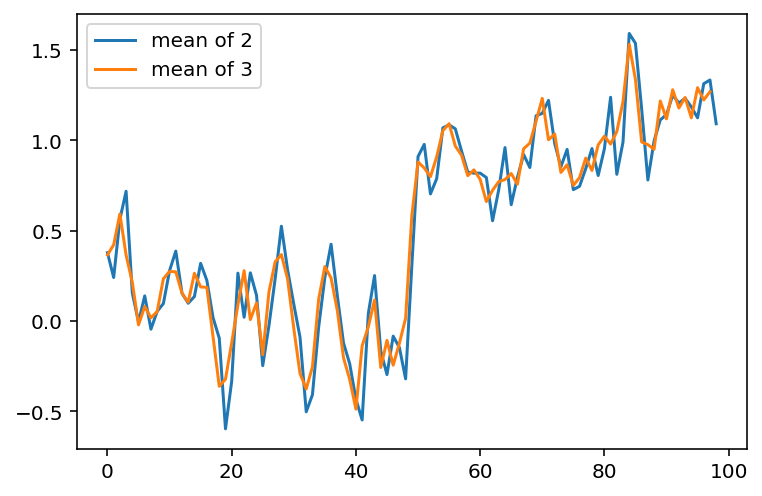

In [6]:
smooth_signal3 = (noisy_signal[:-2] + noisy_signal[1:-1]+ noisy_signal[2:]) / 3
fig, ax = plt.subplots()
ax.plot(smooth_signal, label='mean of 2')
ax.plot(smooth_signal3, label='mean of 3')
ax.legend(loc='upper left');

Απευθείας, με χρήση της συνέλιξης:

smooth_signal3 and smooth_signal3p are equal: True


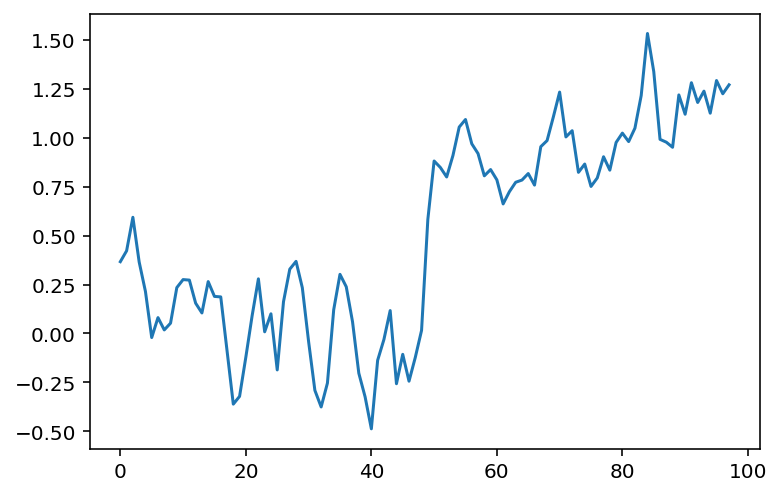

In [7]:
# Same as above, using a convolution kernel
# Neighboring pixels multiplied by 1/3 and summed
mean_kernel3 = np.full((3,), 1/3)
smooth_signal3p = np.convolve(noisy_signal, mean_kernel3, mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal3p)

print('smooth_signal3 and smooth_signal3p are equal:', np.allclose(smooth_signal3, smooth_signal3p))

In [8]:
def convolve_demo(signal, kernel):
    ksize = len(kernel)
    convolved = np.correlate(signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        ax.scatter(np.arange(i, i+ksize),signal[i : i+ksize])
        ax.scatter(i, convolved[i])
    return filter_step

from ipywidgets import interact, widgets

i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 3, value=0)

interact(convolve_demo(noisy_signal, mean_kernel3),i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=97), Output()), _dom_classes=('widget-interact',…


Ας πάρουμε τη συνέλευση από το μέσο όρο των 11 γειτονικών στοιχείων:

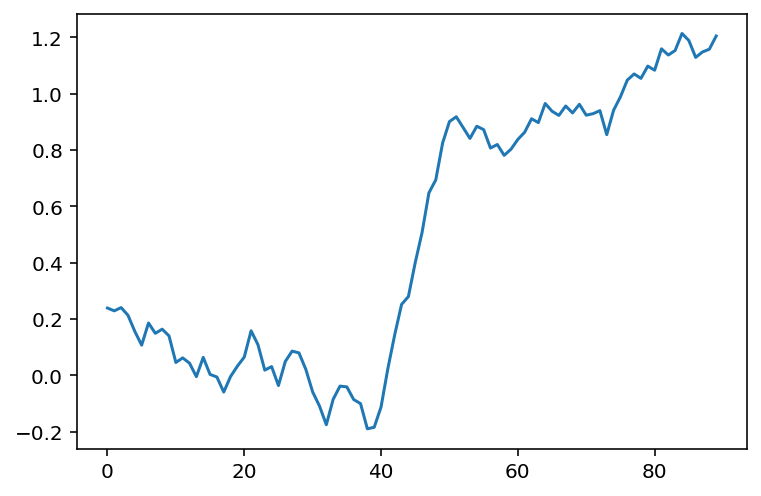

In [9]:
mean_kernel11 = np.full((11,), 1/11)
smooth_signal11 = np.convolve(noisy_signal, mean_kernel11, mode='valid')
fig, ax = plt.subplots()
ax.plot(smooth_signal11);

In [11]:
i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 11,value=0)

interact(convolve_try(noisy_signal, mean_kernel11),i=i_slider);

NameError: ignored

Προφανώς, για να πάρουμε τον μέσο όρο των 11 τιμών, πρέπει να κινηθούμε όλο και πιο μακριά από τις άκρες του πίνακα. Χρησιμοποιώντας το `mode = 'same'` μπορούμε να κάνουμε το κατάλληλο zero padding στις άκρες του πίνακα:  

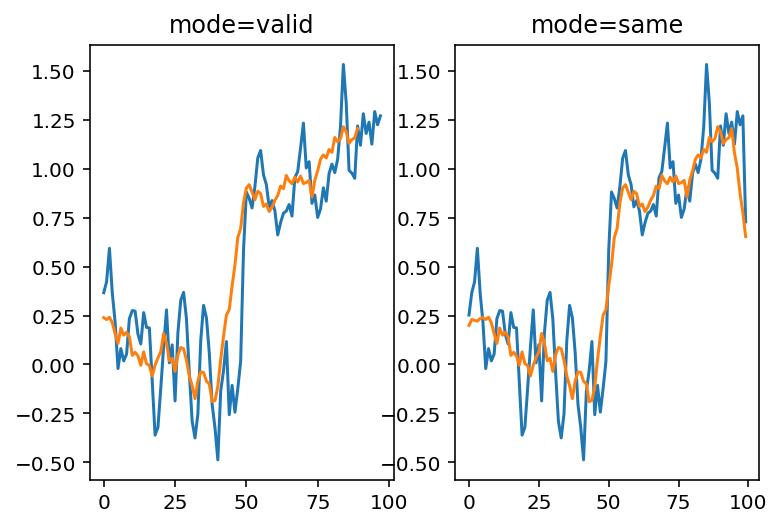

In [12]:
smooth_signal3same = np.convolve(noisy_signal, mean_kernel3,mode='same')
smooth_signal11same = np.convolve(noisy_signal, mean_kernel11,mode='same')

fig, ax = plt.subplots(1, 2)
ax[0].plot(smooth_signal3p)
ax[0].plot(smooth_signal11)
ax[0].set_title('mode=valid')
ax[1].plot(smooth_signal3same)
ax[1].plot(smooth_signal11same)
ax[1].set_title('mode=same');

Αλλά, τώρα βλέπουμε τη επίδραση του zero padding στις άκρες του σήματος.


In [13]:
def convolve_demo_same(signal, kernel):
    ksize = len(kernel)
    padded_signal = np.pad(signal, ksize // 2, mode='constant')
    convolved = np.correlate(padded_signal, kernel)

    def filter_step(i):
        fig, ax = plt.subplots()
        x = np.arange(-ksize // 2,len(signal) + ksize // 2)
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        start, stop = i, i + ksize
        ax.scatter(x[start:stop]+1, padded_signal[start : stop])
        ax.scatter(i, convolved[i])
        ax.set_xlim(-ksize // 2, len(signal) + ksize // 2)
    return filter_step


i_slider = widgets.IntSlider(min=0, max=len(noisy_signal)-1, value=0)

interact(convolve_demo_same(noisy_signal, mean_kernel11), i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

 Για να αποφύγουμε αυτό το φαινόμενο, μπορούμε να διαλέξουμε το `mode=reflect`της convolve

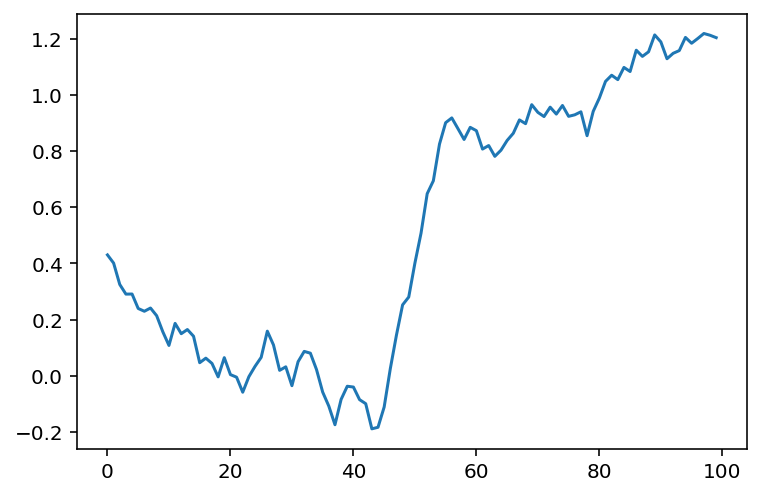

In [14]:
from scipy import ndimage as ndi

smooth_ndi = ndi.convolve(noisy_signal, mean_kernel11, mode='reflect')

plt.plot(smooth_ndi)

#### Συσχέτιση και συνέλιξη

Aς ξαναπάρουμε τη βηματική συνάρτηση:

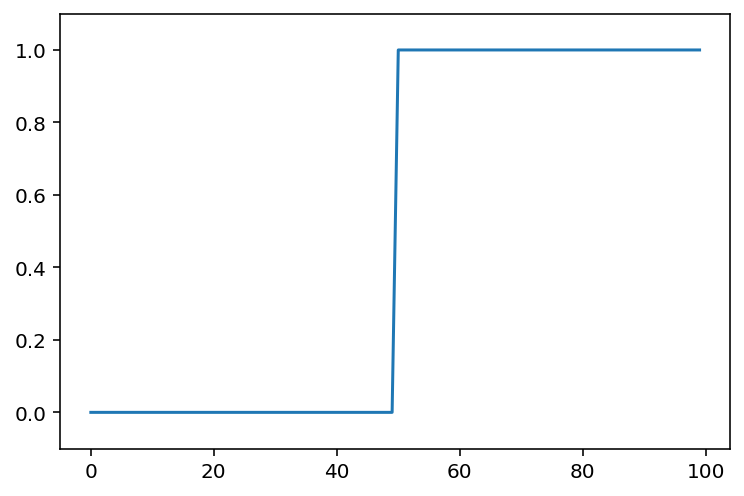

In [15]:
fig, ax = plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1) 

In [0]:
result_corr = np.correlate(step_signal, np.array([-1, 0, 1]),mode='valid')

In [0]:
result_conv = np.convolve(step_signal, np.array([-1, 0, 1]), mode='valid')

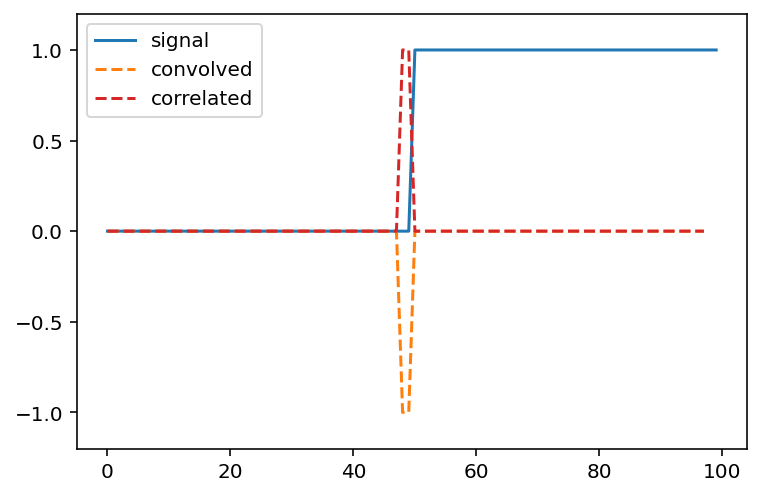

In [18]:
fig, ax = plt.subplots()
ax.plot(step_signal, label='signal')
ax.plot(result_conv, linestyle='dashed', label='convolved')
ax.plot(result_corr, linestyle='dashed', label='correlated',color='C3')
ax.legend(loc='upper left')
ax.margins(y=0.1) 

Η συσχέτιση αποτελεί τη διαδικασία σύγκρισης δύο σημάτων (μοιάζει με την συνέλιξη, απουσιάζει η διαδικασίας της ανάκλασης του σήματος).  Όταν οι γειτονικές τιμές είναι κοντά, η απόκριση του φίλτρου είναι κοντά στο 0. 

Στο σήμα θορύβου θα εφαρμόσουμε συσχέτιση με ένα φίλτρο διαφορά [-1 0 1]:

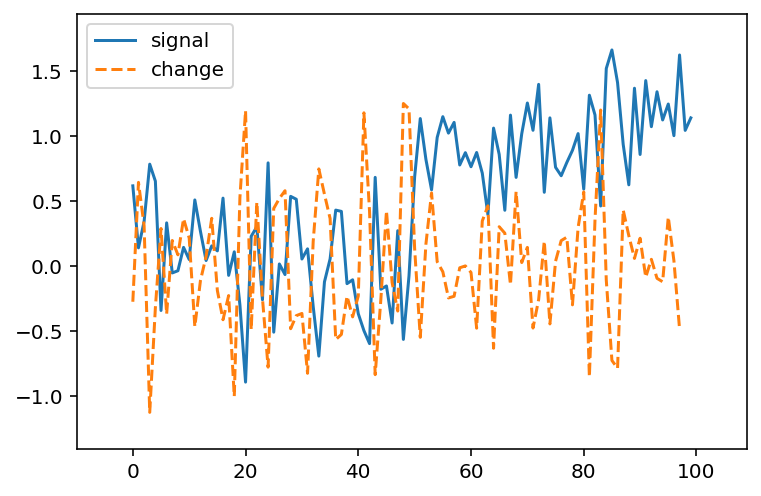

In [19]:
noisy_change = np.correlate(noisy_signal, np.array([-1, 0, 1]))
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(noisy_change, linestyle='dashed', label='change')
ax.legend(loc='upper left')
ax.margins(0.1)

Πάλι εμφανίζεται το φαινόμενο να 'χάνουμε' τις τιμές από την άκρη του πίνακα. Για να το αποφύγουμε θα δημιουργήσουμε ένα φίλτρο που συνδυάζει τόσο τη διαφορά όσο και τη μέση τιμή.

In [20]:
mean_diff = np.correlate([-1, 0, 1], [1/3, 1/3, 1/3], mode='full')
print(mean_diff)

[-0.33333333 -0.33333333  0.          0.33333333  0.33333333]


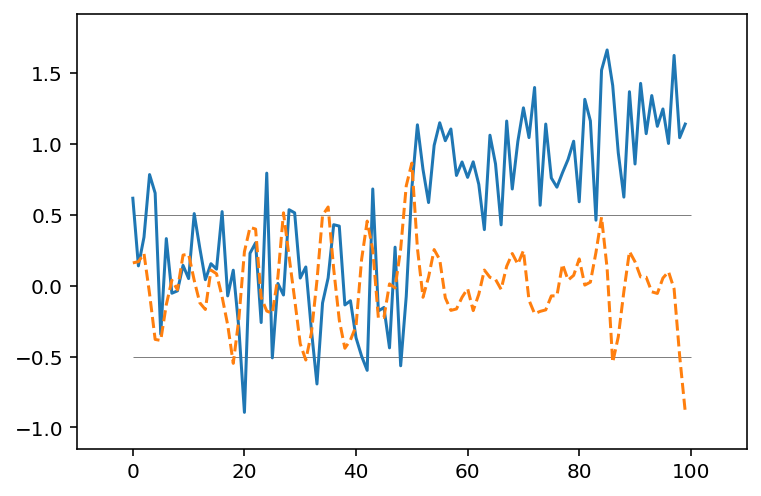

In [21]:
smooth_change = np.correlate(noisy_signal, mean_diff,mode='same')
fig, ax = plt.subplots()
ax.plot(noisy_signal, label='signal')
ax.plot(smooth_change, linestyle='dashed', label='change')
ax.margins(0.1)
ax.hlines([-0.5, 0.5], 0, 100, linewidth=0.5, color='gray');

Ένα Gaussian φίλτρο με διακύμανση $\sigma^2$ δίνεται από τον τύπο: 
$$
k_i = \frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{(x_i - x_0)^2}{2\sigma^2}\right)}
$$

Έστω ότι επιθυμούμε να φτιάξουμε ένα φίλτρο Γκαουσιανό με πλάτος 9, κέντρο 4 και σ=2 

In [22]:
xi = np.arange(9)
x0 = 9 // 2  # 4
x = xi - x0

sigma = 1
gaussian_kernel = (1/(np.sqrt(2*np.pi)*sigma) *np.exp(-(x**2) / 2*sigma**2))

print('Πίνακας x:',x)
print('xi:',xi)
print('Gaussian kernel',gaussian_kernel)


Πίνακας x: [-4 -3 -2 -1  0  1  2  3  4]
xi: [0 1 2 3 4 5 6 7 8]
Gaussian kernel [1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
 3.98942280e-01 2.41970725e-01 5.39909665e-02 4.43184841e-03
 1.33830226e-04]


Θα κάνουμε συνέλιξη του Gaussian φίλτρου με ένα άλλο φίλτρο (διαφοράς γειτονικών τιμών) και έπειτα κάνω συνέλιξη του νέου φίλτρου με το σήμα θορύβου.

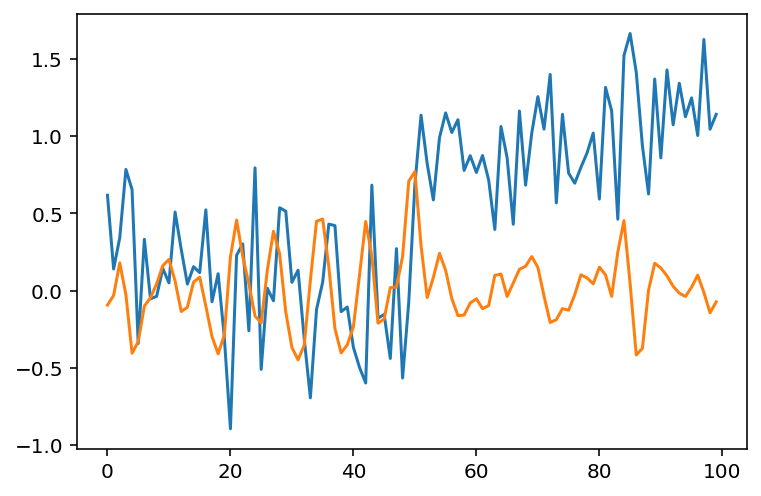

In [23]:
gauss_diff = np.convolve(gaussian_kernel, [-1, 0, 1], mode='full')
smooth_diff = ndi.correlate(noisy_signal, gauss_diff, mode='reflect')

plt.plot(noisy_signal)
plt.plot(smooth_diff)


##Χωρικό φιλτράρισμα σε εικόνες

Από το φιλτράρισμα σε μονοδιάστατα σήματα θα περάσουμε στις εικόνες (δισδιάστατα σήματα) 

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


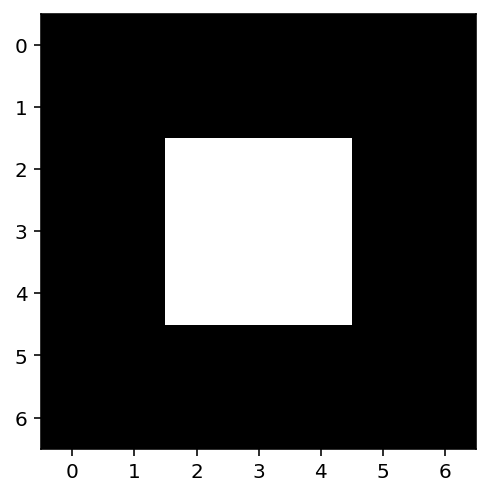

In [24]:
import numpy as np

im_square = np.zeros((7, 7), dtype=float)
im_square[2:5, 2:5] = 1

print(im_square)

fig, ax = plt.subplots()
ax.imshow(im_square);

### Παράδειγμα με φίλτρο μέσης τιμής

Για κάθε εικονοστοιχείο, το φίλτρο( που αποτελείται από έναν πυρήνα - kernel) ορίζει κατά πόσο θα επηρεάσουν την τιμή του  οι τιμές των γειτονικών εικονοστοιχείων του.

In [25]:
mean_kernel = np.full((3, 3), 1/9)

print(mean_kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Η εφαρμογή ενός (γραμμικού) φίλτρου ουσιαστικά σημαίνει: 

* Κεντράρισμα ενός φίλτρου(ή πυρήνα) στο εικονοστοιχείο,
* Πολλαπλασιασμός όλων των στοιχείων *κάτω από* τον πυρήνα με τις τιμές *του  πυρήνα*,
* Αντικατάσταση της τιμής του κεντρικού εικονοστοιχείο με το άθροισμα των αποτελεσμάτων των πολλαπλασιασμών.

Πρακτικά, τη λειτουργία της συνέλιξης σε μία εικόνα μπορούμε να τη φανταστούμε ως ένα σταθερό "φίλτρο" που περνάει πάνω από αυτήν εικόνα. 

![](https://drive.google.com/uc?id=1WxxnVG9y6Up1LhzC_2VMKfNAUFatiei7)


![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)

Η διαδικασία αυτή είναι γνωστή ως συνέλιξη.

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.33333333 0.66666667 1.         0.66666667 0.33333333
  0.        ]
 [0.         0.22222222 0.44444444 0.66666667 0.44444444 0.22222222
  0.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.22222222 0.11111111
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


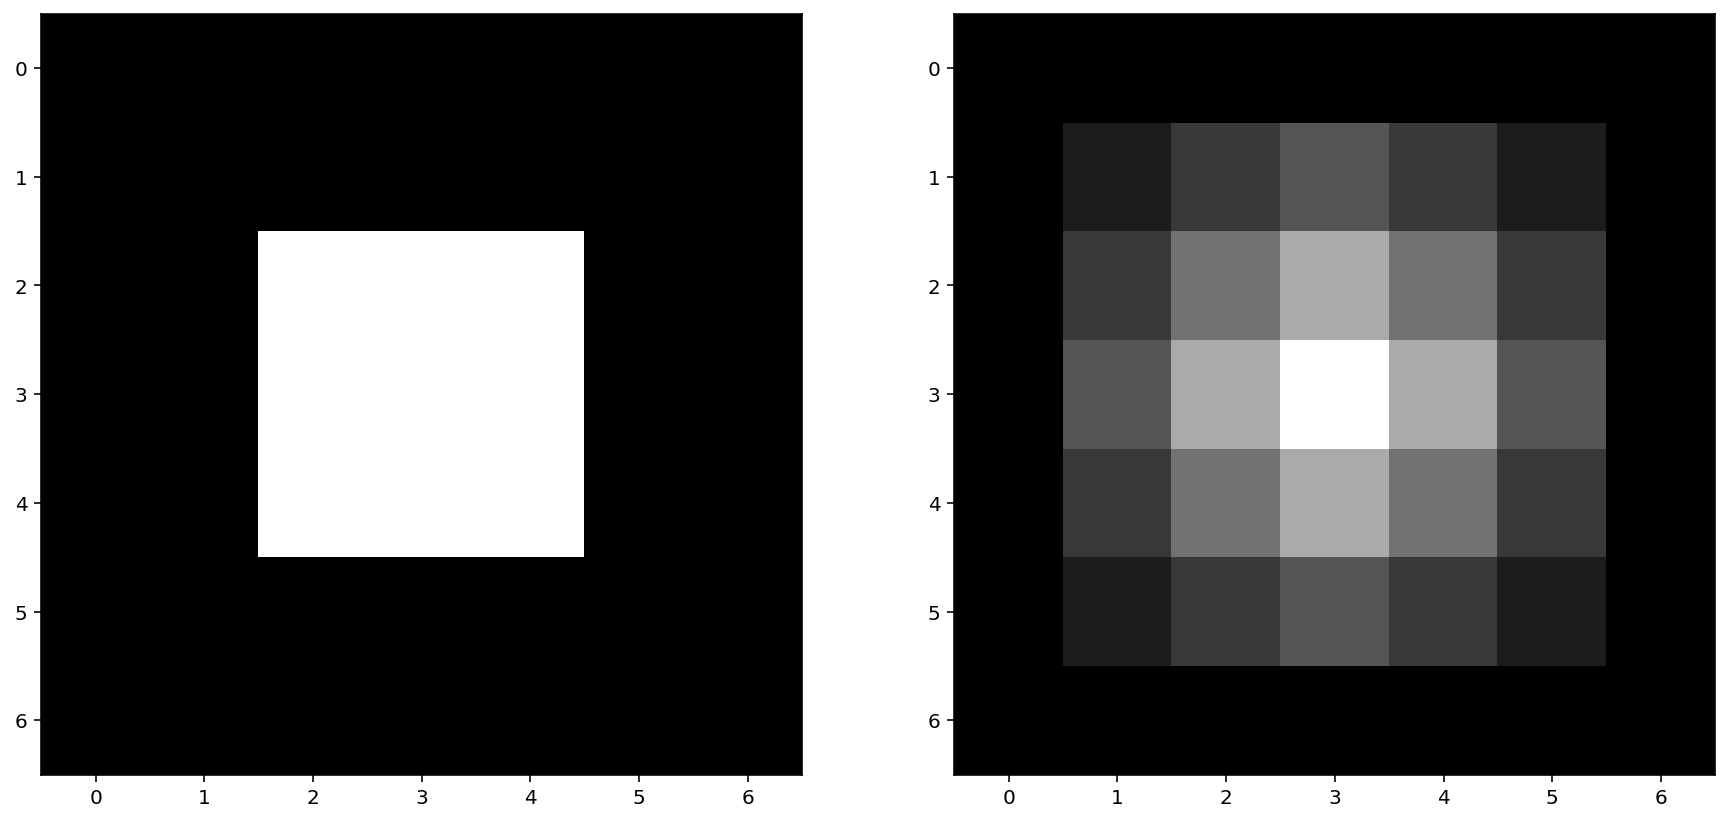

In [26]:
import scipy.ndimage as ndi

gaussian_square=ndi.correlate(im_square, mean_kernel)

print(im_square)
print(mean_kernel)
print(gaussian_square)
    
f, (ax0,ax1) = plt.subplots(1, 2, figsize=(15, 10))
ax0.imshow(im_square);
ax1.imshow(gaussian_square);


Το φίλτρο της μέσης τιμής είναι ένα απλό φίλτρο εξομάλυνσης και παράγει δύο σημαντικά αποτελέσματα: 

* Η ένταση του φωτεινού εικονοστοιχείου μειώθηκε. 
* Η ένταση της περιοχής κοντά στο φωτεινό εικονοστοιχείο αυξήθηκε.

Μπορείτε να δείτε ένα demo για να παρατηρήσετε βήμα προς βήμα την υλοποίηση της συνέλιξης (ενδιαφέρον έχουν τα βήματα 0 (την αρχή της εικόνας - αγνοεί τις τιμές εκτός εικόνας) και 9 (στην αρχή του φωτεινού πλαισίου)

In [0]:
#--------------------------------------------------------------------------
#  Convolution Demo
#--------------------------------------------------------------------------
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_demo(image, vmax=1):
    mean_factor = 1.0 / 9.0  # This assumes a 3x3 kernel.
    iter_kernel_and_subimage = iter_kernel(image)

    image_cache = []

    def mean_filter_step(i_step):
        while i_step >= len(image_cache):
            filtered = image if i_step == 0 else image_cache[-1][-1][-1]
            filtered = filtered.copy()

            (i, j), mask, subimage = next(iter_kernel_and_subimage)
            filter_overlay = color.label2rgb(mask, image, bg_label=0,
                                             colors=('cyan', 'red'))
            filtered[i, j] = np.sum(mean_factor * subimage)
            image_cache.append(((i, j), (filter_overlay, filtered)))

        (i, j), images = image_cache[i_step]
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        
        for ax, imc in zip(axes, images):
            ax.imshow(imc, vmax=vmax)
            rect = patches.Rectangle([j - 0.5, i - 0.5], 1, 1, color='yellow', fill=False)
            ax.add_patch(rect)
            
        plt.show()
    return mean_filter_step


def mean_filter_interactive_demo(image):
    from ipywidgets import IntSlider, interact
    mean_filter_step = mean_filter_demo(image)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    interact(mean_filter_step, i_step=step_slider)


def iter_kernel(image, size=1):
    """ Yield position, kernel mask, and image for each pixel in the image.

    The kernel mask has a 2 at the center pixel and 1 around it. The actual
    width of the kernel is 2*size + 1.
    """
    width = 2*size + 1
    for (i, j), pixel in iter_pixels(image):
        mask = np.zeros(image.shape, dtype='int16')
        mask[i, j] = 1
        mask = ndi.grey_dilation(mask, size=width)
        #mask[i, j] = 2
        subimage = image[bounded_slice((i, j), image.shape[:2], size=size)]
        yield (i, j), mask, subimage


def iter_pixels(image):
    """ Yield pixel position (row, column) and pixel intensity. """
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]


def bounded_slice(center, xy_max, size=1, i_min=0):
    slices = []
    for i, i_max in zip(center, xy_max):
        slices.append(slice(max(i - size, i_min), min(i + size + 1, i_max)))
    return tuple(slices)



In [28]:
mean_filter_interactive_demo(im_square)

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…


Σημείωση: Τα *συνελικτικά νευρωνικά δίκτυα (CNNs)*, (που ίσως έχετε ακούσει πολλά για αυτά τα τελευταία χρόνια) στηρίζονται στην ίδια αρχή. Η διαφορά είναι ότι οι τιμές του πυρήνα τους δεν οι σταθερές (όπως οι τιμές στο φίλτρο μέσης τιμής) αλλά μαθαίνονται κατά την εκπαίδευση του νευρωνικού, έτσι ώστε να είναι ικανά να βρίσκουν συγκεκριμένα χαρακτηριστικά της εικόνας.

In [29]:
print(np.sum(mean_kernel))

1.0


Το άθροισμα των τιμών του πυρήνα είναι ίσο με 1. Γιατί συμβαίνει αυτό;

##Βαθυπερατά φίλτρα (Low pass filters)

Ιδιότητες:

* Φιλτράρουν τις υψηλές συχνότητες (σήματα θορύβου).
* Λειαίνουν απότομες μεταβολές στην ένταση.
* Θολώνουν την εικόνα (blurring).

Βασικές κατηγορίες βαθυπερατών φίλτρων:

* Φίλτρα μέσης τιμής (mean filters)
* Φίλτρα Gaussian μορφής (Gaussian filters)
* Φίλτρα Butterworth , Chebyshev κλπ
* Φίλτρα διάμεσης τιμής (median filters, μη γαρμμικό)
* Μη γραμμικά φίλτρα (harmonic κλπ)

Θα υποδειγματοληπτήσουμε μία εικόνα (cameraman) με σκοπό να δούμε πώς δρουν πάνω της διάφορα βαθυπερατά φίλτρα. Για το πείραμά μας θα δώσουμε  στο "step" argument την τιμή 10 έτσι ώστε να δημιουργήσουμε μία υποδειγματοληπτημένη εικόνα 10 φορές μικρότερου μεγέθους. 

(Προσοχή  σε κανονικές συνθήκες υποδειγματοληψίας εικόνας χρησιμοποιήστε `skimage.transform.rescale`):

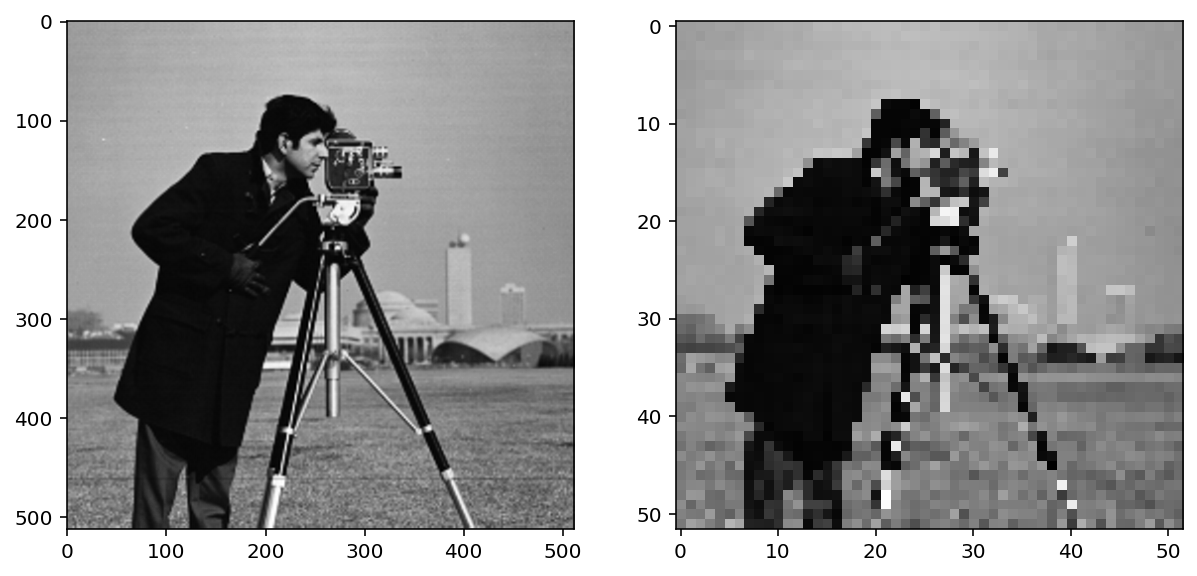

In [30]:
from skimage import data

image = data.camera()
pixelated = image[::10, ::10]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax1.imshow(pixelated) ;

Θα δημιουργήσουμε μία συνάρτηση για τις απεικονίσεις:

In [0]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)


### Βασικά βαθυπερατά φίλτρα

#### Φίλτρο μέσης τιμής

Θα εφαρμόσουμε το φίλτρο μέσης τιμής στην υποδειγματοληπτημένη εικόνα

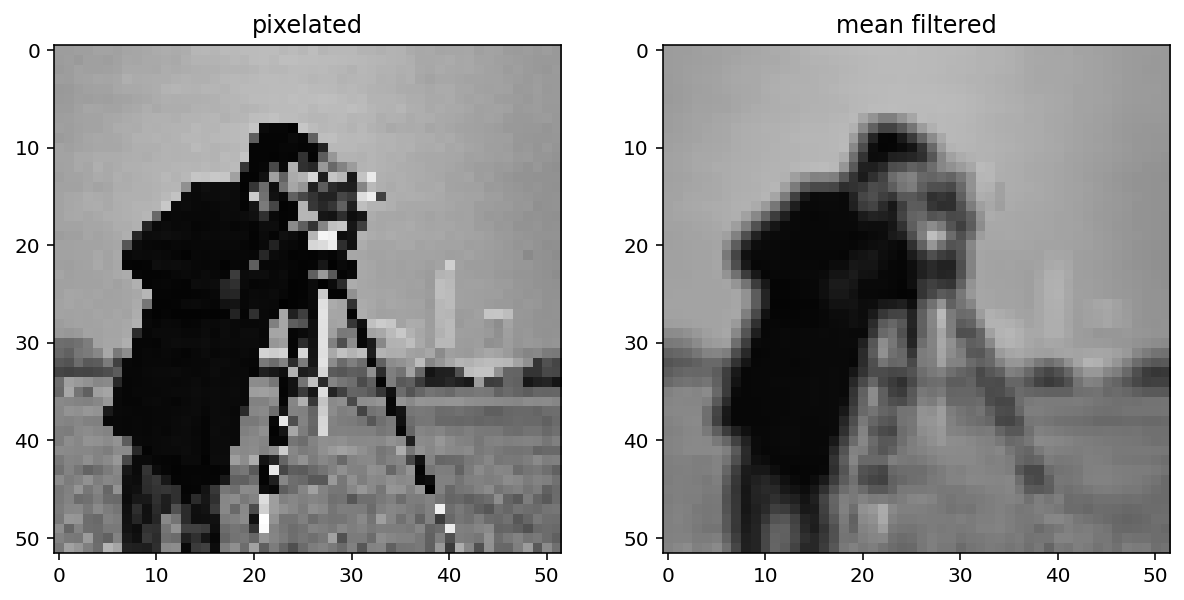

In [32]:
filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all(pixelated, filtered, titles=['pixelated', 'mean filtered'])

Το αποτέλεσμα του φιλτραρίσματος προκαλεί λείανση των απότομων μεταβολών της έντασης της εικόνας: Οι ακμές (το σύνορο μεταξύ σκοτεινών και φωτεινών εικονοστοιχείων) εξομαλύνονται επειδή τα σκοτεινά εικονοστοιχεία μειώνουν την ένταση των γειτονικών εικονοστοιχείων ενώ τα φωτεινά εικονοστοιχεία κάνουν το αντίθετο.

Προφανώς, υπάρχουν πολλοί standard πυρήνες φίλτρων (πάνω από μισό αιώνα) που χρησιμοποιούνται στην επεξεργασία σημάτων και εικόνων. Το [skimage](https://scikit-image.org/docs/dev/api/skimage.filters.html) διαθέτει μία μεγάλη βιβλιοθήκη με έτοιμες συναρτήσεις τέτοιου σκοπού.

#### Gaussian filter

Το κλασικό φίλτρο για επεξεργασία εικόνας είναι το Gaussian filter. 
Είναι ένα βαθυπερατό φίλτρο, παρόμοιο με το μέσης τιμής, που ο πυρήνας του δίνει διαβαθμισμένη βαρύτητα (γκασουσιανή συνάρτηση) στα εικονοστοιχεία με τα οποία συνελίσσεται.

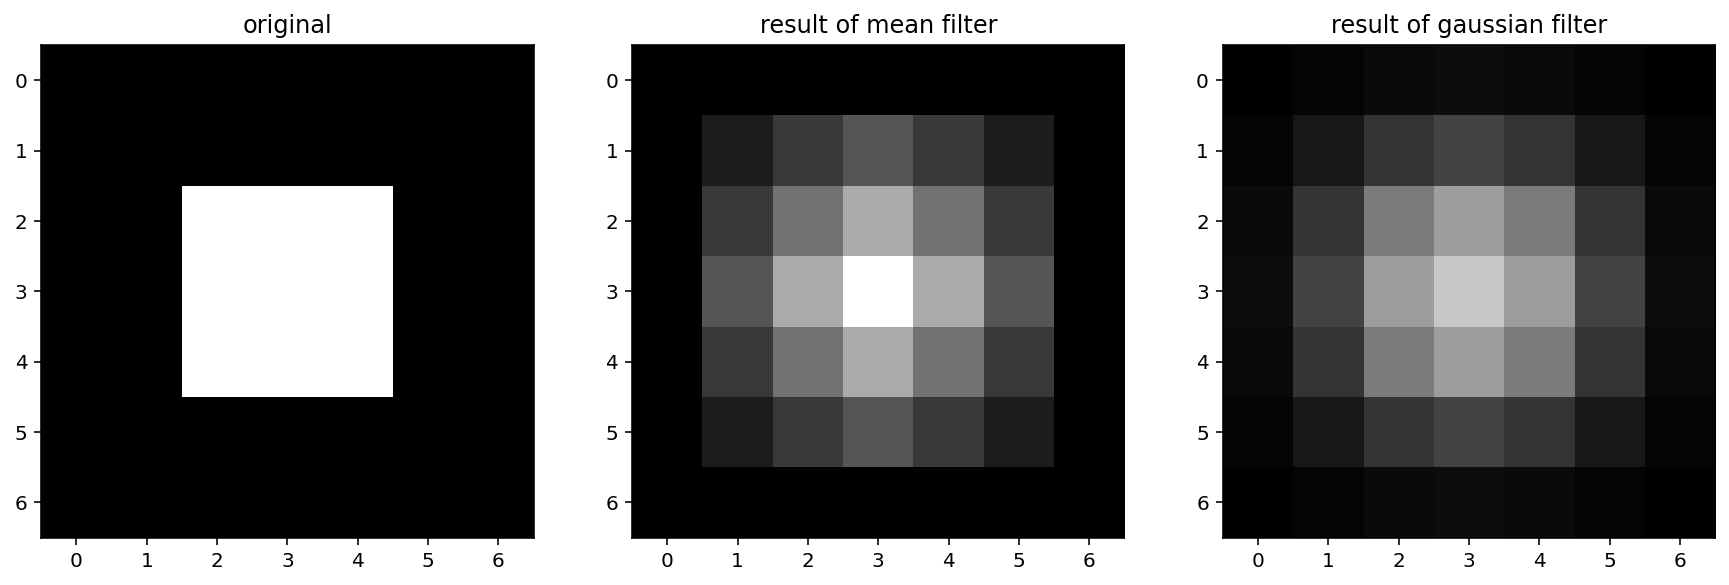

In [33]:

from skimage import filters

mean_kernel = np.full((3, 3), 1/9)
smooth_mean = ndi.correlate(im_square, mean_kernel)

sigma = 1
smooth = filters.gaussian(im_square, sigma)

imshow_all(im_square, smooth_mean, smooth, titles=['original', 'result of mean filter', 'result of gaussian filter'])

Για το Gaussian φίλτρο, το `sigma`, η τυπίκη απόκλιση, ορίζει το μέγεθος της γειτονιάς.

Αν το εφαρμόσουμε στην πραγματική εικόνα, θα έχουμε:

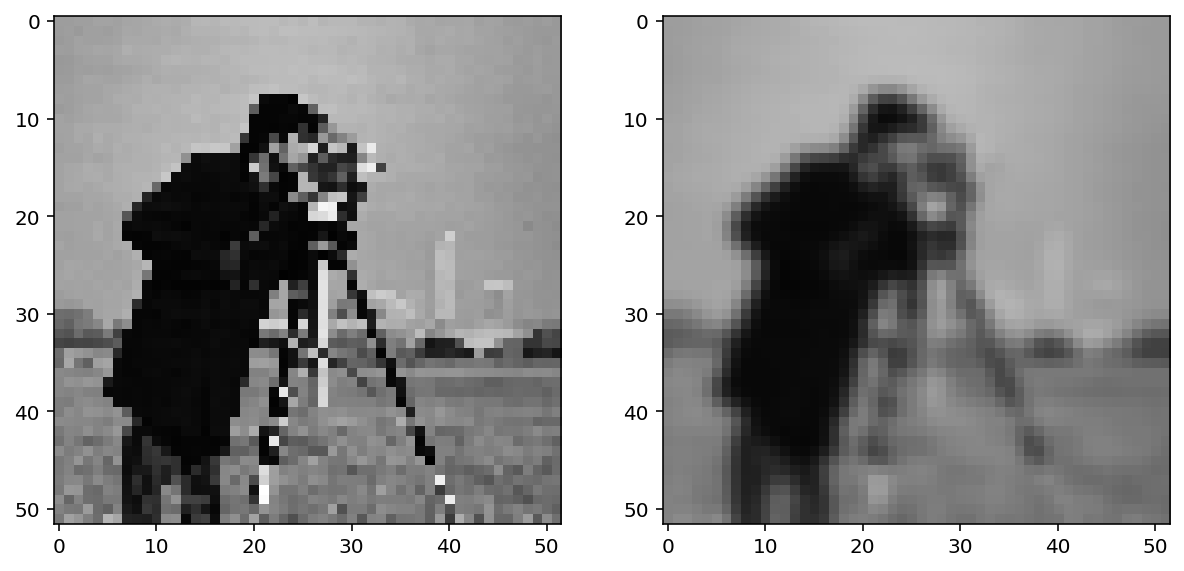

In [34]:
from skimage import img_as_float
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.

pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)
imshow_all(pixelated_float, smooth)

Το αποτέλεσμα του gaussian φίλτρου δεν φαίνεται τόσο διαφορετικό από το φίλτρο μέσης τιμής. Αλλά στην πράξη προτιμάμαι το  Gaussian φίλτρο επειδή δεν έχει αιχμηρές μεταβάσεις (σκεφτείτε τι συμβαίνει στο πεδίο των συχνοτήτων) και δέχεται διαβαθμίσεις βάσει απόστασης από το κέντρο του φίλτρου. 


Στη συνέχεια, αλλάζουμε το μέγεθος του πυρήνα του φίλτρου μέσης τιμής και την τιμή της τυπική απόκλιση του Gaussian φίλτρου για να παράγει περίπου ίση ποσότητα εξομάλυνσης στα δύο αποτελέσματα.

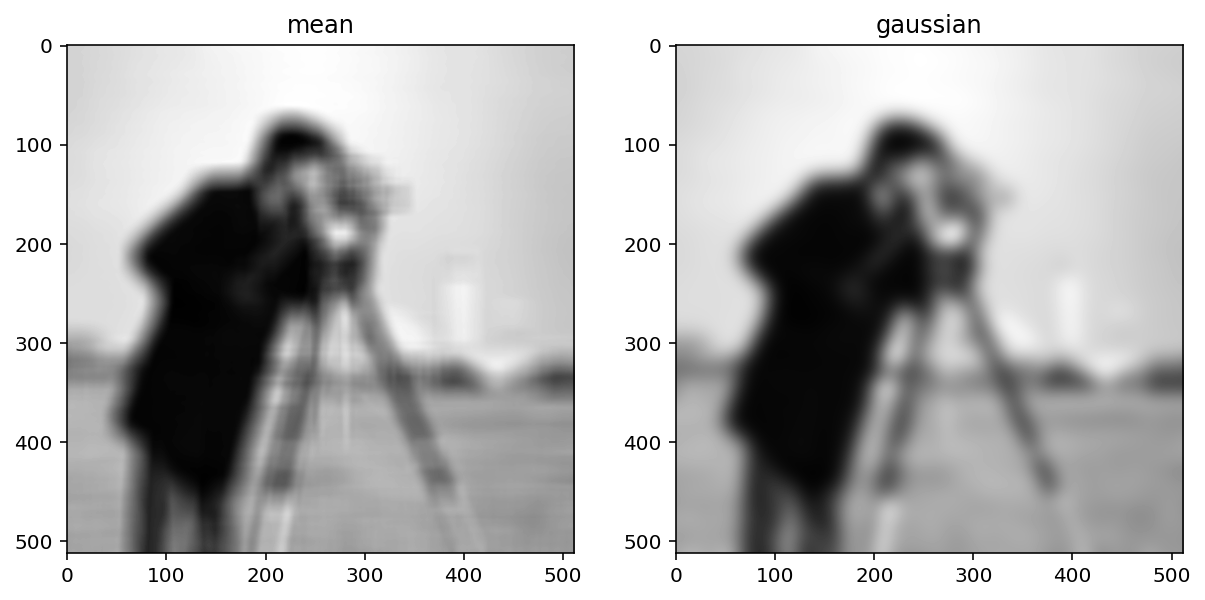

In [35]:
size = 10
structuring_element = np.ones((3*size, 3*size))
smooth_mean = filters.rank.mean(image, structuring_element)

smooth_gaussian = filters.gaussian(image, size)

titles = ['mean', 'gaussian']

imshow_all(smooth_mean, smooth_gaussian, titles=titles)

Ο πυρήνας του Gaussian φίλτρου για ένα εικονοστοιχείο που βρίσκεται στην γραμμή $r$ και στην στήλη $c$ του πυρήνα είναι:

$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$

Πρακτικά, αυτή η τιμή είναι πολύ κοντά στο μηδέν για τιμές μεγαλύτερες από $ 4 \sigma $ μακριά από το κέντρο:

### Φίλτρα αποθορυβοποίησης (Denoising filters)

Τα προηγούμενα φίλτρα (mean value & gaussian) είναι γραμμικά φίλτρα (πολλαπλασιασμός στοιχείο με στοιχείο του πυρήνα και της εικόνας) και ομαλοποιούν μια εικόνα μάλλον ομοιόμορφα, συμπεριλαμβανομένων και των ακμών μεταξύ διαφορετικών περιοχών της. 

Τα ακόλουθα φίλτρα είναι μη γραμμικά και κάνουν αποθορυβοποίηση, διατηρώντας τα χαρακτηριστικά της εικόνας και αφαιρώντας μόνο το θόρυβο. Ο διαχωρισμός μεταξύ θορύβου και χαρακτηριστικών μπορεί, φυσικά, να εξαρτάται σε μεγάλο βαθμό από την κατάσταση της εικόνας και είναι υποκειμενικός.


#### Φίλτρο ενδιάμεσης τιμής (Median Filter)

Το ενδιάμεσο φίλτρο είναι το κλασικό φίλτρο προστασίας των ακμών. Το φίλτρο παίρνει ένα σύνολο εικονοστοιχείων (δηλ. τα εικονοστοιχεία που αντιστοιχούν σε έναν πυρήνα) και επιστρέφει τη διάμεση τιμή εντός αυτής της γειτονιάς. 

Επειδή οι περιοχές κοντά σε ακμές θα έχουν πολλές σκοτεινές τιμές και πολλές τιμές φωτεινότητας (σχετικά χωρισμένες σε 2 ομάδες τιμών), ο διάμεσος σε μια ακμή θα είναι πιθανότατα είτε ανοιχτόχρωμος είτε σκοτεινός, αντί για ενδιάμεση τιμή μεταξύ τους. Με αυτόν τον τρόπο δεν εξομαλύνουμε ακμές.

![](https://drive.google.com/uc?id=1DBmEbtx0dmBUhvNQGeTsGnpqBmr2INN2)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


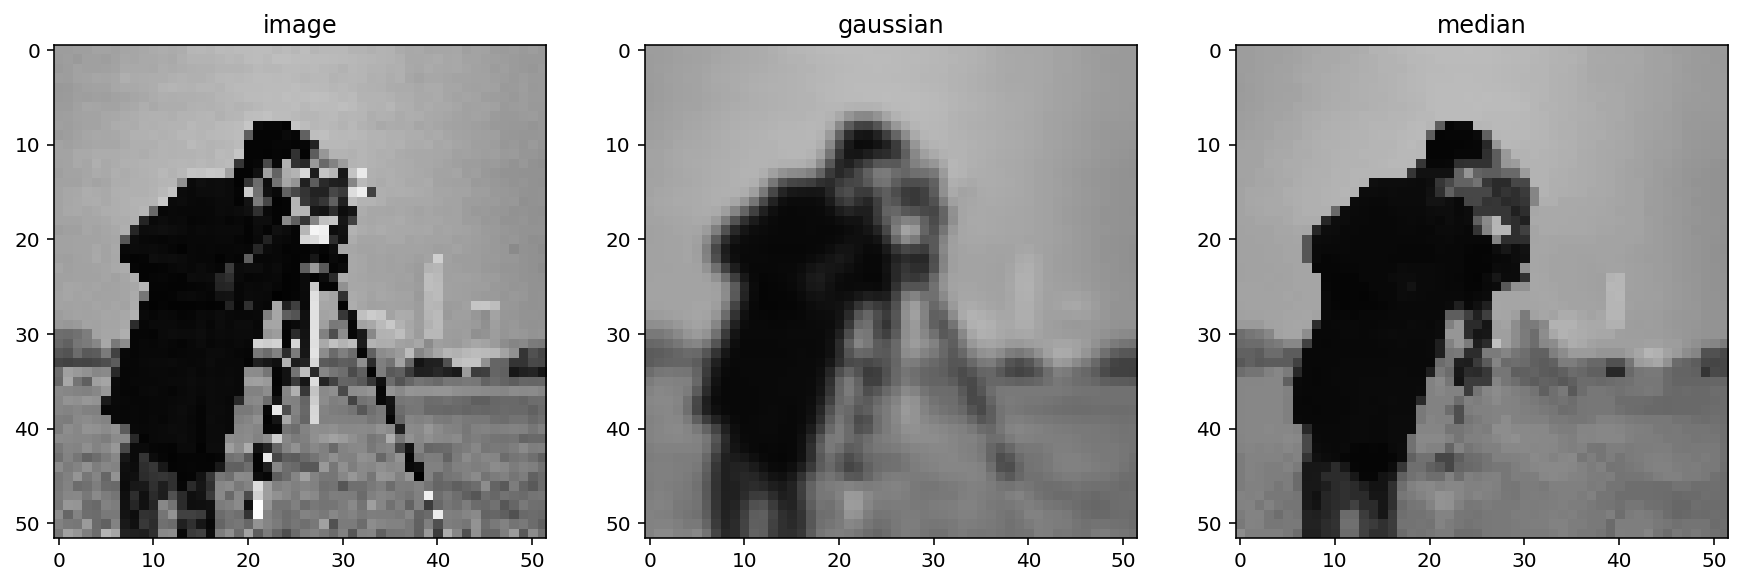

In [36]:
from skimage.morphology import disk
# Mask array that defines (>0) area of the image included in the local neighborhood.
neighborhood = disk(radius=2)  # "selem" is often the name used for "structuring element" The neighborhood expressed as a 2-D array of 1’s and 0’s. If None, a full square of size 3 is used.
# Mask array that defines (>0) area of the image included in the local neighborhood. 
print(neighborhood)

median = filters.rank.median(pixelated, neighborhood)

titles = ['image', 'gaussian', 'median']

imshow_all(pixelated, smooth, median, titles=titles)

Εφαρμογή σε άλλη εικόνα

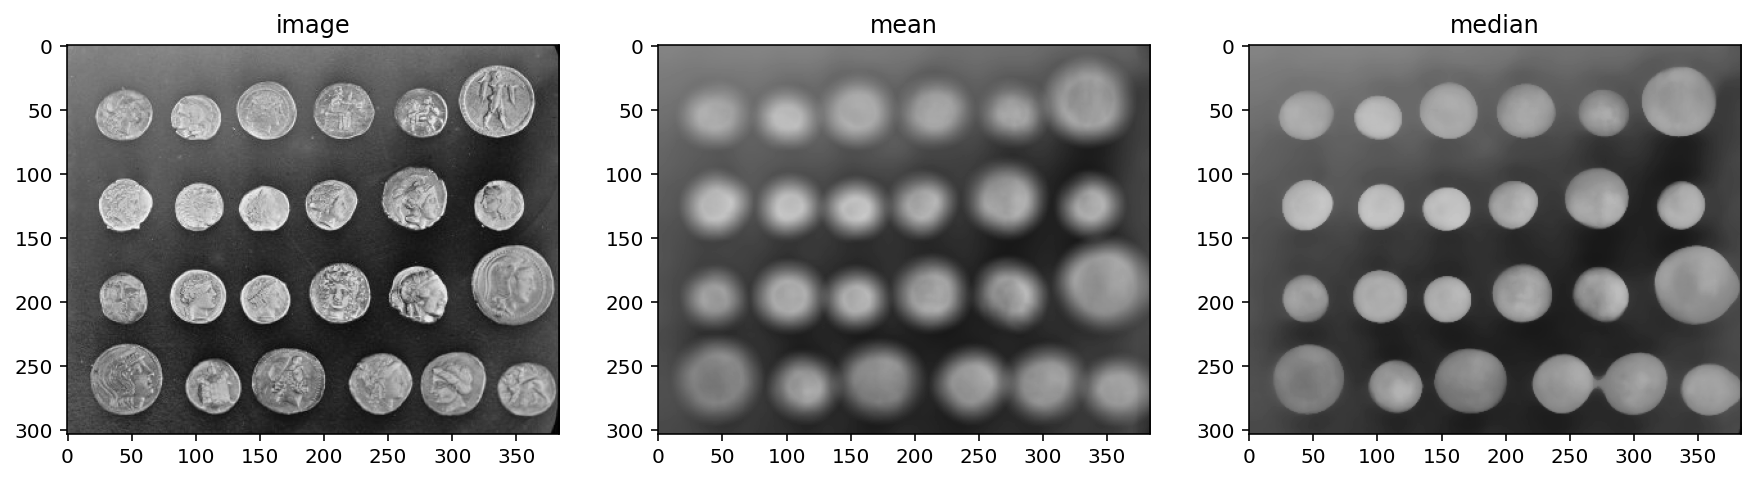

In [37]:
neighborhood = disk(10)
coins = data.coins()
mean_coin = filters.rank.mean(coins, neighborhood)
median_coin = filters.rank.median(coins, neighborhood)
titles = ['image', 'mean', 'median']
imshow_all(coins, mean_coin, median_coin, titles=titles)

Παρατηρήστε ότι οι ακμές των νομισμάτων διατηρούνται μετά την εφαρμογή του φίλτρου ενδιάμεσης τιμής.

Το φίλτρο ενδιάμεσης τιμής είναι ιδανικό για την εξαγωγή θορύβου τύπου "salt and pepper"

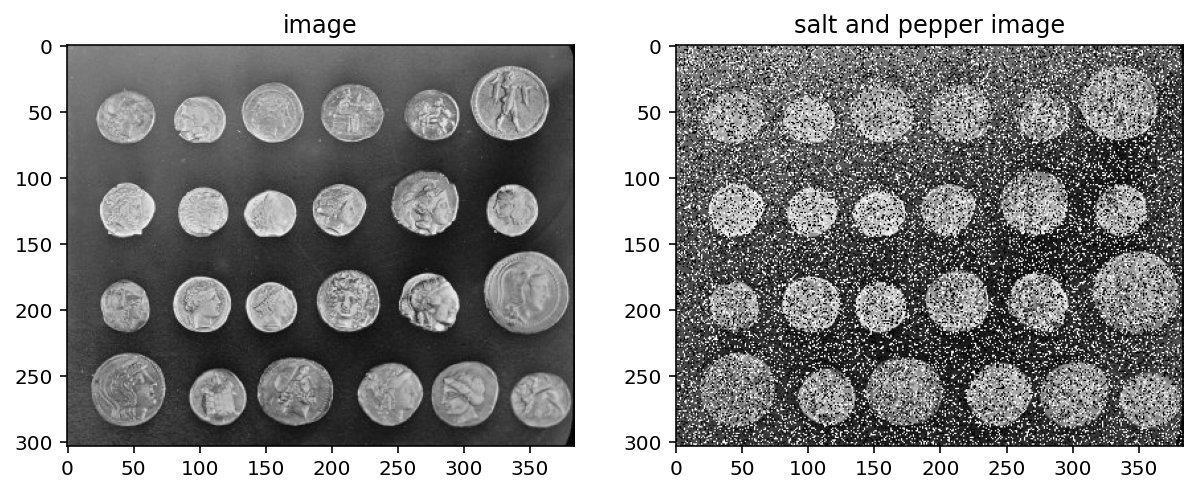

In [38]:
from skimage.util import random_noise
 
# Add salt-and-pepper noise to the image.
noise_coins = random_noise(coins, mode='s&p',amount=0.3)
imshow_all(coins, noise_coins, titles=['image', 'salt and pepper image'])

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


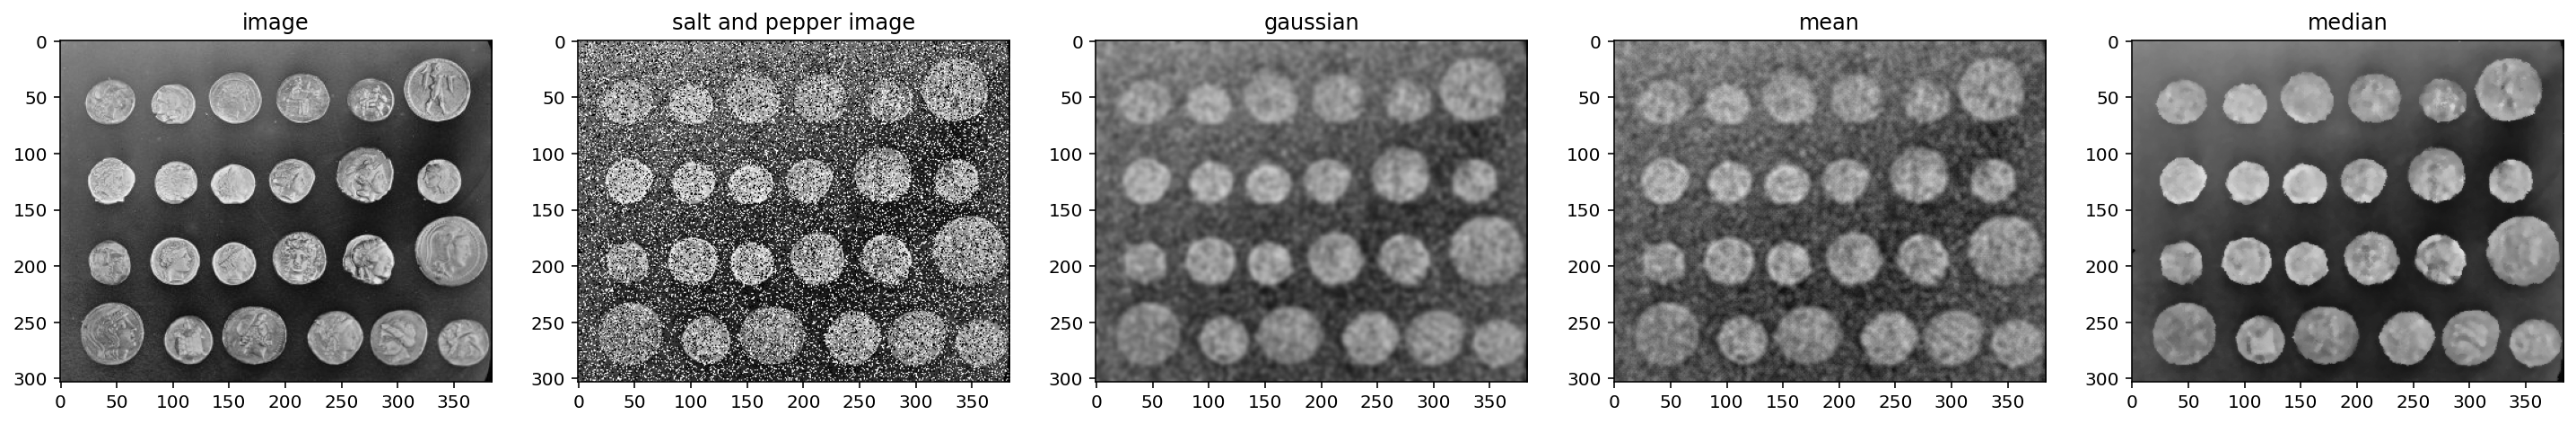

In [39]:
neighborhood = disk(3)
gaussian_noise_coins = filters.gaussian(noise_coins, 2)
mean_noise_coins = filters.rank.mean(noise_coins, neighborhood)
median_noise_coins = filters.rank.median(noise_coins, neighborhood)
imshow_all(coins, noise_coins, gaussian_noise_coins, mean_noise_coins,median_noise_coins, titles=['image', 'salt and pepper image', 'gaussian','mean', 'median'])

---